In [1]:
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas 

In [29]:
def extract_data(filename):
    df = pandas.read_csv(filename)
    ydata = df.T1.values
    udata = df.Q1.values
    t = numpy.arange(len(df)-1)
    return ydata, udata, t

In [35]:
def ARMAX(filename):
    ydata, udata, t = extract_data(filename)[0], extract_data(filename)[1], extract_data(filename)[2]
    ARMA_results = sm.tsa.ARMA(ydata, order=(2,1), exog = udata).fit()
    y_armax = ARMA_results.predict(0, len(t)-1, udata)
    return y_armax

In [38]:
def Results(filename):
    y_armax = ARMAX(filename)
    df = pandas.read_csv(filename)
    t = numpy.arange(len(df)-1)
    plt.plot(df.Time, df.T1, '.', label = 'observation')
    plt.plot(t, y_armax, label = 'ARX prediction')
    plt.ylabel('Temperature 1 (degress celcius)')
    plt.xlabel('Time (s)')
    plt.title(filename)
    plt.legend()
    plt.show()

C:\Users\annam\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


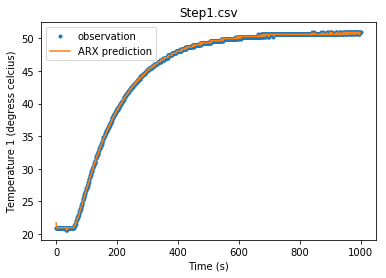

In [39]:
Results("Step1.csv")

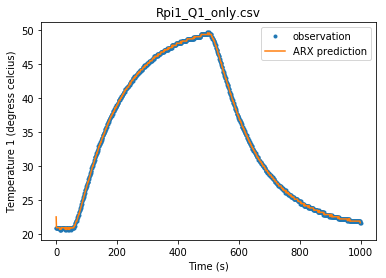

In [40]:
Results("Rpi1_Q1_only.csv")

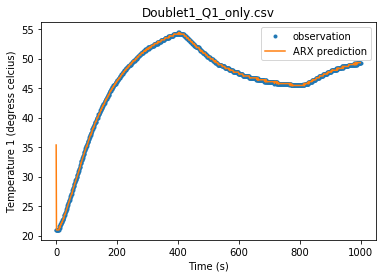

In [41]:
Results("Doublet1_Q1_only.csv")